<h1>PPMI Data Visualization</h1>

In [51]:
import os
import nrrd
import numpy as np
import pandas as pd
import seaborn as sb
import nibabel as nib
import scipy.linalg as scipy
import matplotlib.pyplot as plt

In [52]:
#Defining constants
DATA_PATH = ".\\data"
IMAGE_COLLECTION_CHARAC_FOLDER = "image_collection_characteristics"
IMAGE_COLLECTION_CHARAC_FILE = "characteristics.csv"

CSV_SEPARATOR = ";"

<h3>Subject characteristics exploration and visualization</h3>

In [53]:
image_collection_charac_df = pd.read_csv(os.path.join(DATA_PATH, IMAGE_COLLECTION_CHARAC_FOLDER, IMAGE_COLLECTION_CHARAC_FILE), sep=CSV_SEPARATOR)

In [54]:
image_collection_charac_df.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,526412,85242,Prodromal,M,64,1,DTI,DTI Full Tensors-MRI,Processed,2/18/2015,NRRD,NaN
1,526549,85242,Prodromal,M,64,1,DTI,DTI Full Tensors-EPI,Processed,2/18/2015,NRRD,NaN
2,452502,65006,GenCohort Unaff,F,54,1,DTI,DTI Full Tensors-MRI,Processed,3/06/2014,NRRD,NaN
3,452982,65006,GenCohort Unaff,F,54,1,DTI,DTI Full Tensors-EPI,Processed,3/06/2014,NRRD,NaN
4,526706,60091,Prodromal,M,62,1,DTI,DTI Full Tensors-MRI,Processed,5/12/2015,NRRD,NaN


In [55]:
is_healthy_control = image_collection_charac_df['Group'] == "Control"
is_patient = image_collection_charac_df['Group'] == "PD"

is_male = image_collection_charac_df['Sex'] == "M"
is_female = image_collection_charac_df['Sex'] == "F"

<h3>Study population age analysis</h3>

<Figure size 432x288 with 0 Axes>

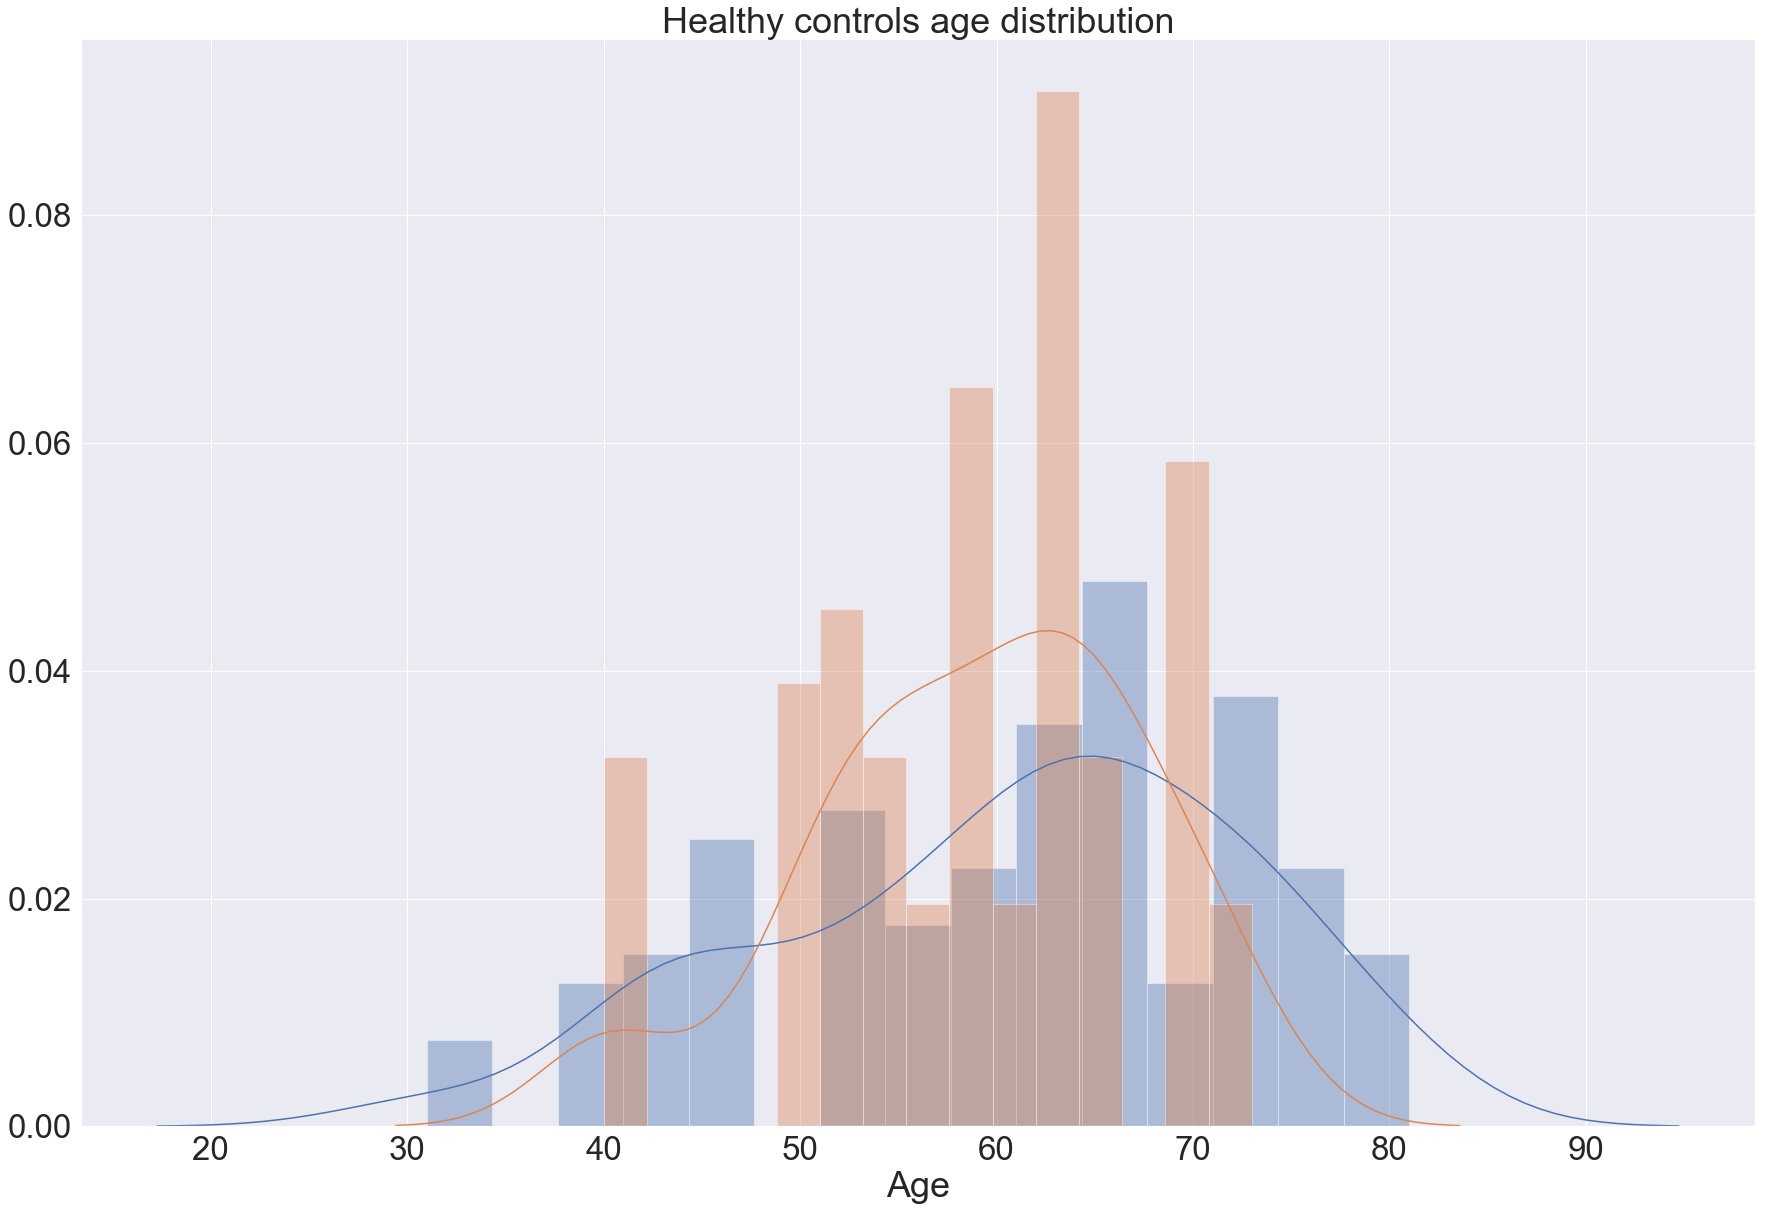

In [65]:
plt.figure()
sb.set(font_scale=3)
Xfig, ax = plt.subplots(figsize=(30,20))
ax.set_title("Healthy controls age distribution")
sb.distplot(charac[is_healthy_control & is_male]['Age'], ax=ax, bins=15)
sb.distplot(charac[is_healthy_control & is_female]['Age'], ax=ax, bins=15)

<Figure size 432x288 with 0 Axes>

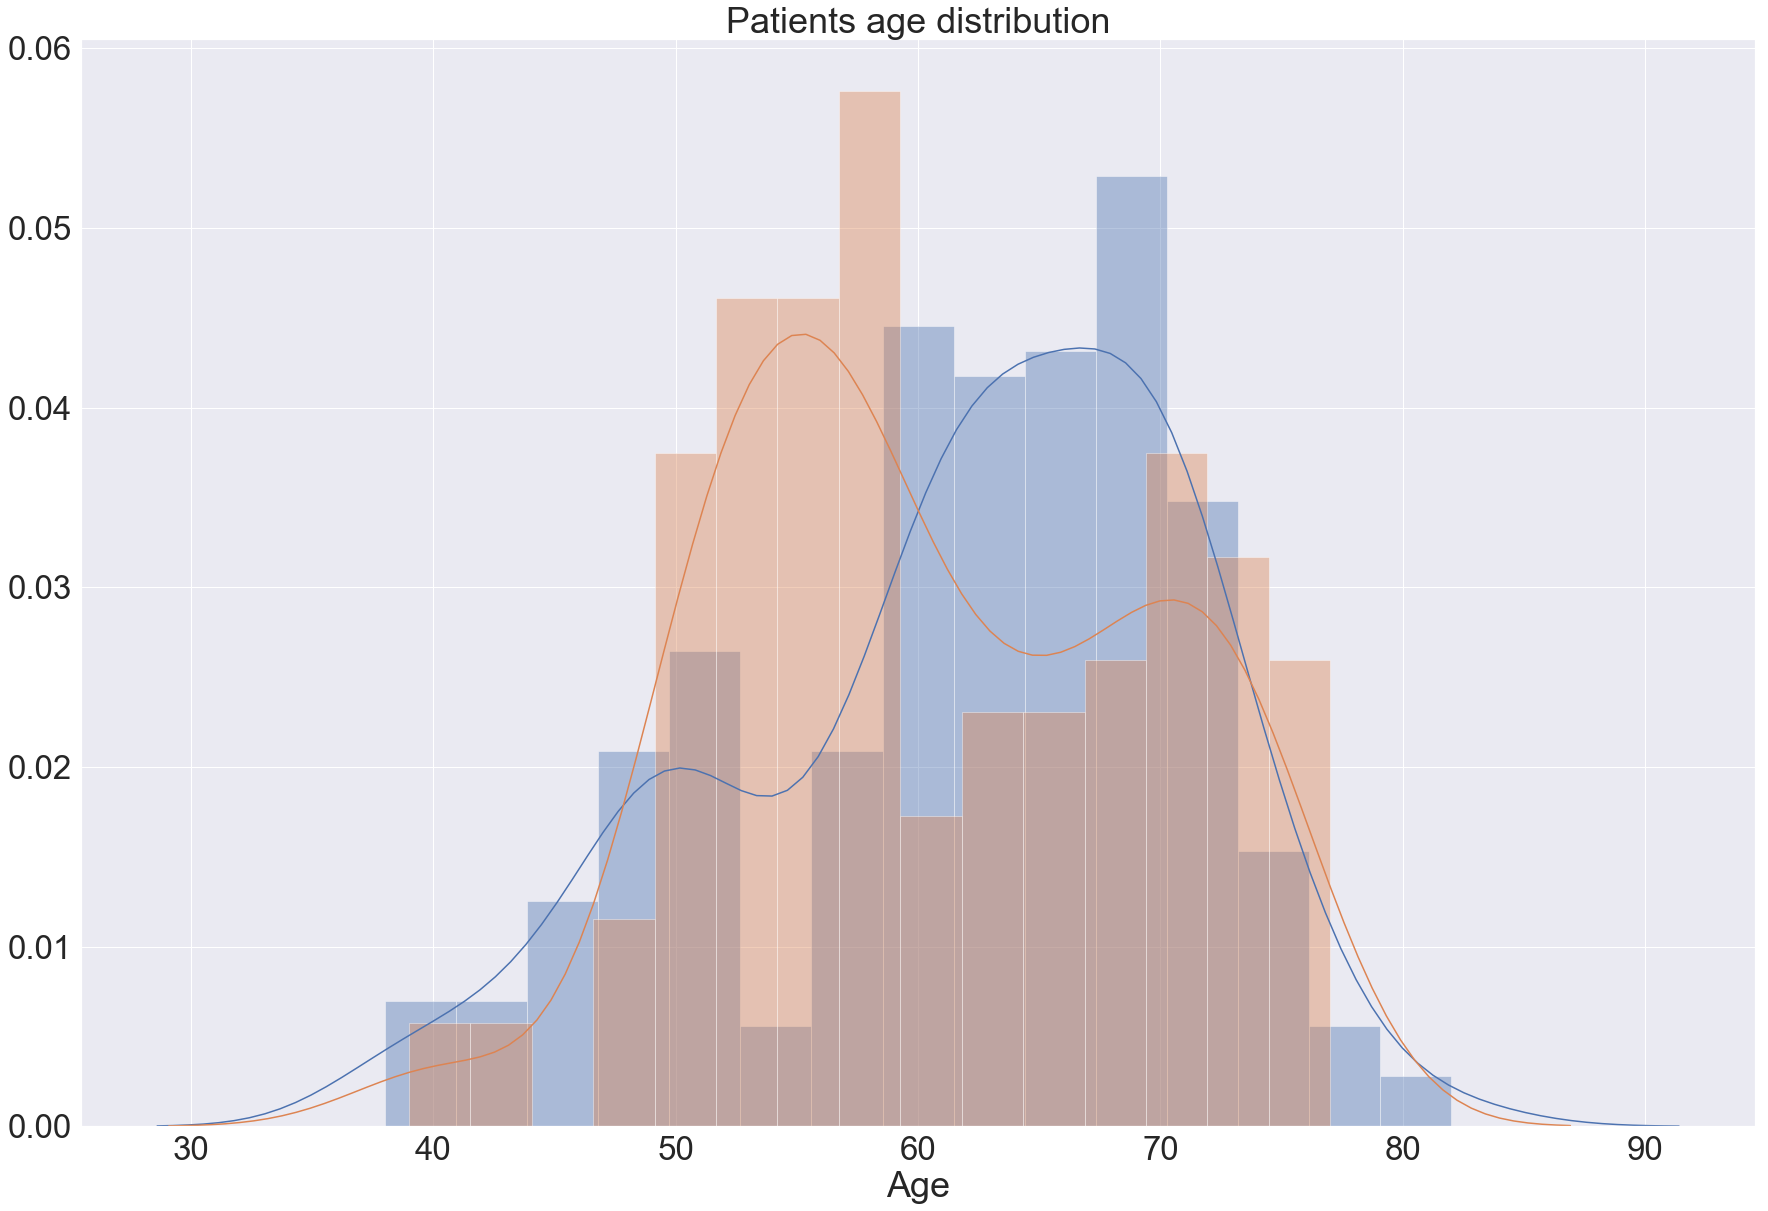

In [69]:
plt.figure()
sb.set(font_scale=3)
Xfig, ax = plt.subplots(figsize=(30,20))
ax.set_title("Patients age distribution")
sb.distplot(charac[is_patient & is_male]['Age'], ax=ax, bins=15)
sb.distplot(charac[is_patient & is_female]['Age'], ax=ax, bins=15)

In [ ]:
g = sb.FacetGrid(image_collection_charac_df, row='Group', col='Sex')
g.map(sb.distplot, '')

Text(0,0.5,'Nb. of subjects')

<Figure size 432x288 with 0 Axes>

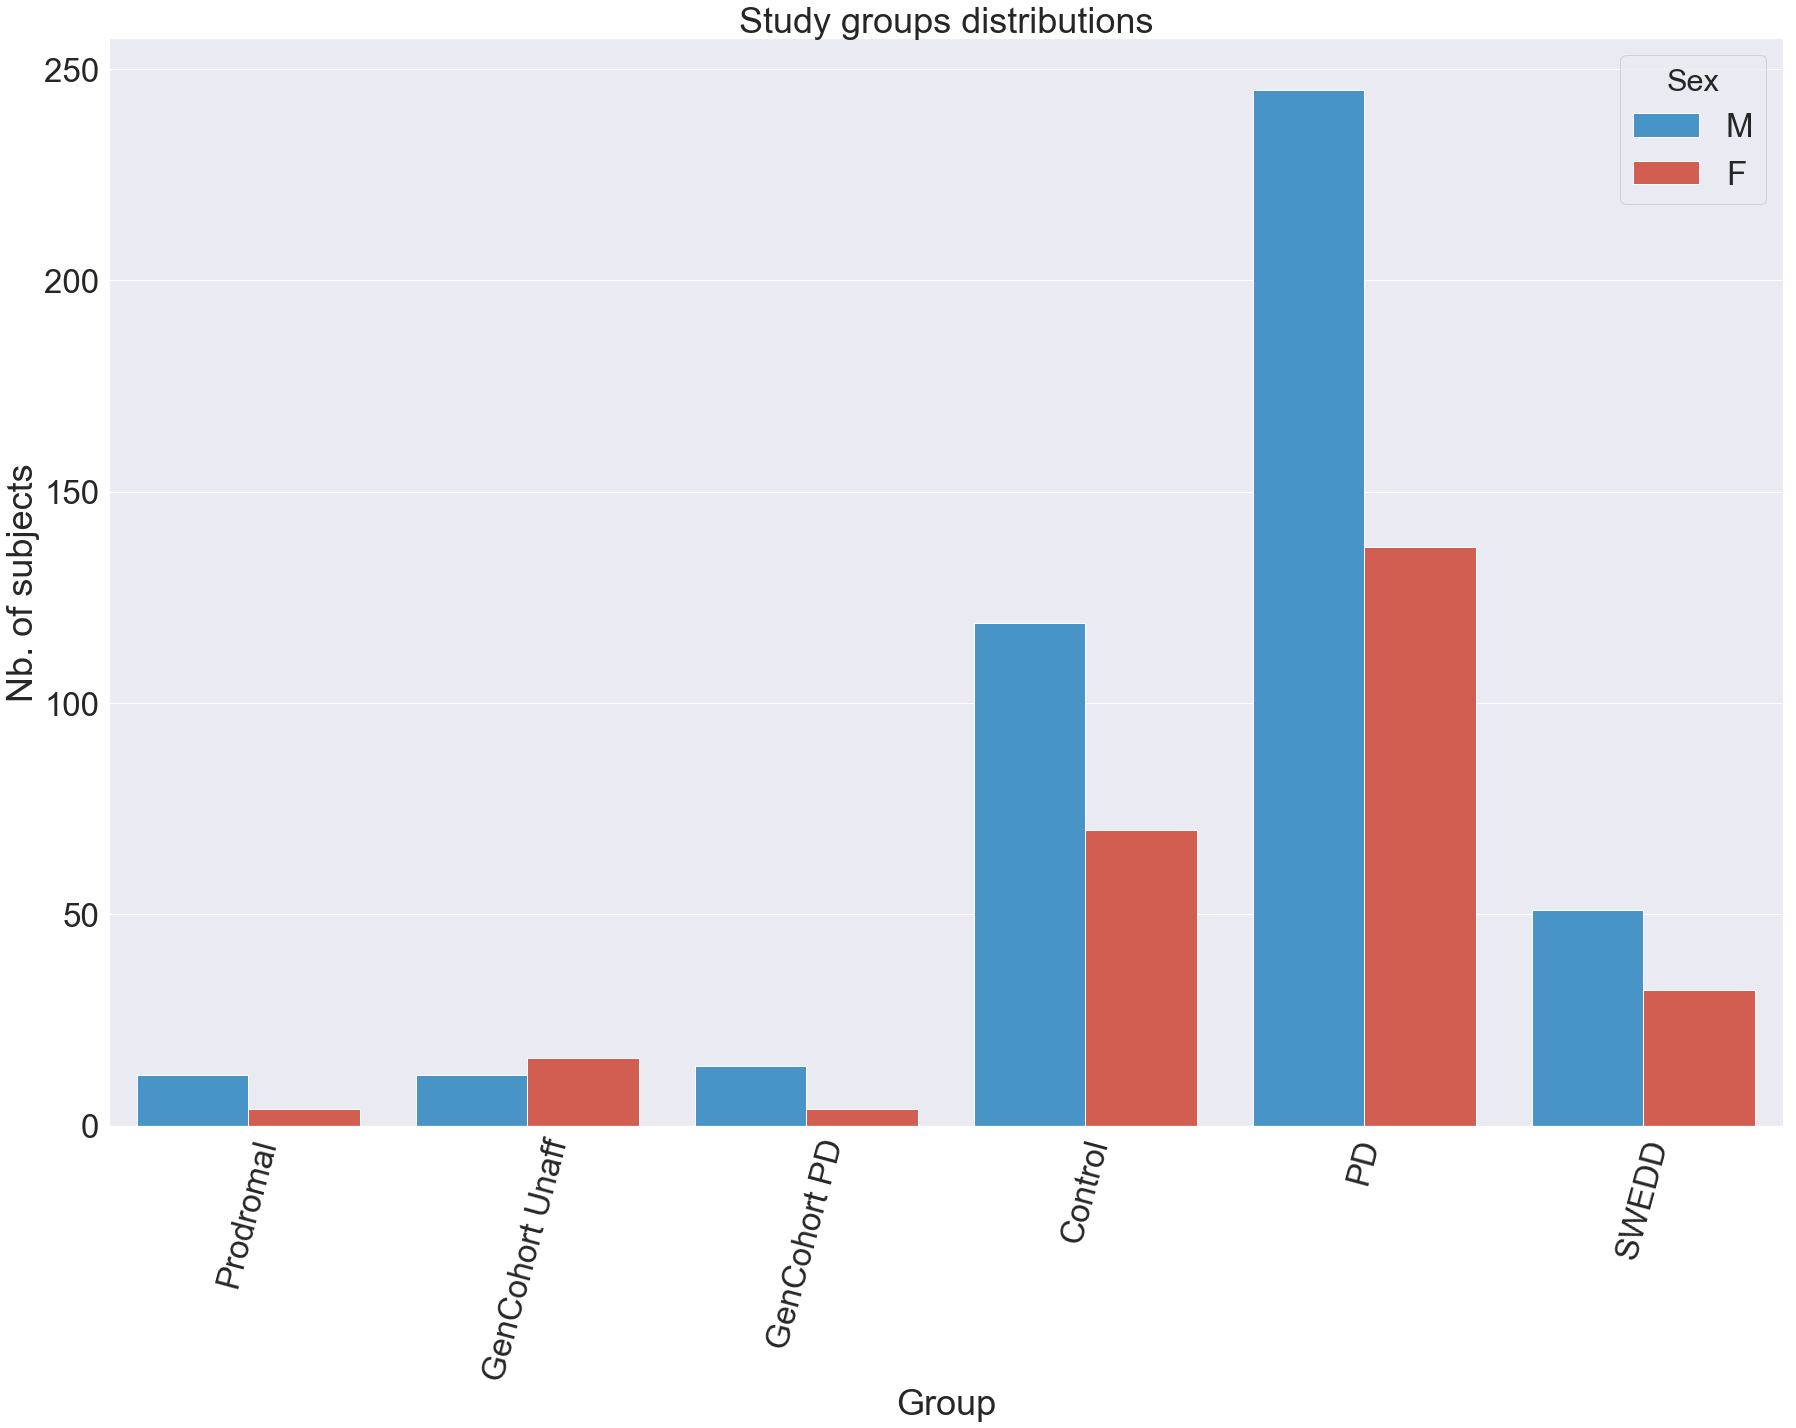

In [63]:
plt.figure()
sb.set(font_scale=3)
Xfig, ax = plt.subplots(figsize=(30,20))
ax.set_title("Study groups distributions")
count_plot = sb.countplot(x="Group", data=charac, hue="Sex",palette={'M': "#3498db", 'F': "#e74c3c"},ax=ax)

for label in count_plot.get_xticklabels():
    label.set_rotation(75)

count_plot.set_ylabel("Nb. of subjects")


In [142]:
dataFrame = pd.DataFrame(charac['Group'].value_counts()).reset_index()
dataFrame.columns = ['Group', 'Count']
dataFrame

,Group,Count
0,PD,382
1,Control,189
2,SWEDD,83
3,GenCohort Unaff,28
4,GenCohort PD,18
5,Prodromal,16
